# **Step 1: Load and Clean Data**

In [2]:
import numpy as np
import pandas as pd

filepath = "Spam_Email_Dataset/emails.csv"

df = pd.read_csv(filepath)
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Shuffle the DataFrame deterministically using a fixed random_state (seed)
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
print("Before Shuffle:\n", df.head())  # See the original data
print("Shuffled Data:\n", shuffled_df.head(10))  # See the shuffled data


Before Shuffle:
                                                 text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
Shuffled Data:
                                                 text  spam
0  Subject: re : energy derivatives conference - ...     0
1  Subject: financial maths course , part 2  vinc...     0
2  Subject: re : bullet points  please respond to...     0
3  Subject: re : enron default swaps  darrell ,  ...     0
4  Subject: re : power question  steve ,  elena c...     0
5  Subject: all wraps around graand  hello concet...     1
6  Subject: allocations  it is now official ! ! !...     0
7  Subject: invitation to sunday dinner with vinc...     0
8  Subject: re : ming sit  vince ,  thanks for th...     0
9  Subject: no further 

In [5]:
# Shuffle data for better training
df = shuffled_df

In [6]:
# read about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
# missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
# check for dulicate values
df.duplicated().sum()

np.int64(33)

In [9]:
# remove dulicate values
df = df.drop_duplicates(keep='first')

In [10]:
# check for dulicate values
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(5695, 2)

# **Step 2: Exploratory Data Analysis (EDA)**

In [12]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

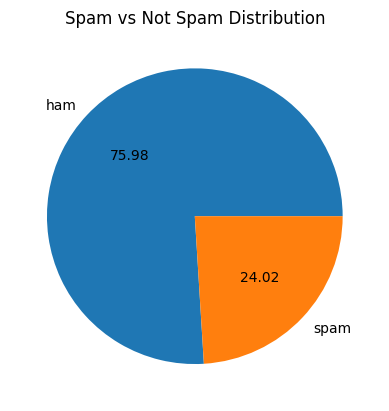

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.title('Spam vs Not Spam Distribution')
plt.show()

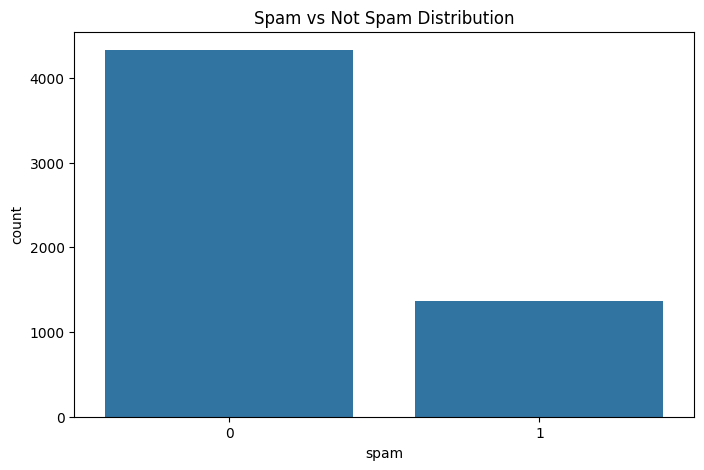

spam
0    4327
1    1368
Name: count, dtype: int64


In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='spam', data=df)
plt.title('Spam vs Not Spam Distribution')
plt.show()
print(df['spam'].value_counts())

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
df.loc[:, 'num_characters'] = df['text'].apply(len)
df.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_7692\1237944450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_characters'] = df['text'].apply(len)


,text,spam,num_characters
0,Subject: re : energy derivatives conference - ...,0,2000
1,"Subject: financial maths course , part 2 vinc...",0,148
2,Subject: re : bullet points please respond to...,0,760
3,"Subject: re : enron default swaps darrell , ...",0,1098
4,"Subject: re : power question steve , elena c...",0,745


In [24]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))
df.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_7692\3906747489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))


,text,spam,num_characters,num_words
0,Subject: re : energy derivatives conference - ...,0,2000,459
1,"Subject: financial maths course , part 2 vinc...",0,148,33
2,Subject: re : bullet points please respond to...,0,760,167
3,"Subject: re : enron default swaps darrell , ...",0,1098,222
4,"Subject: re : power question steve , elena c...",0,745,146


In [25]:
df.loc[:, 'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_7692\826803682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,text,spam,num_characters,num_words,num_sentences
0,Subject: re : energy derivatives conference - ...,0,2000,459,23
1,"Subject: financial maths course , part 2 vinc...",0,148,33,3
2,Subject: re : bullet points please respond to...,0,760,167,19
3,"Subject: re : enron default swaps darrell , ...",0,1098,222,13
4,"Subject: re : power question steve , elena c...",0,745,146,7


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


# **Step 3: Data Preprocessing**
* Lower case
* Tokenization
* Remove special characters
* Remove stop words and punctuation

In [27]:
def preprocess_text(text):
    # Tokenize the text, convert to lowercase, and remove non-alphanumeric tokens
    tokens = [word for word in nltk.word_tokenize(text.lower()) if word.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Apply stemming to each token
    # tokens = [ps.stem(word) for word in tokens]
    
    # Return the processed text as a string
    return " ".join(tokens)

# **Test preprocess_text function**

In [28]:
preprocess_text('Hi! My self Karan Khatri and currently I am persuing Bachelors of techonology from nirma university.')

'hi self karan khatri currently persuing bachelors techonology nirma university'

In [29]:
df.loc[:, 'processed_text']=df['text'].apply(preprocess_text)
df.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_7692\3612720902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'processed_text']=df['text'].apply(preprocess_text)


,text,spam,num_characters,num_words,num_sentences,processed_text
0,Subject: re : energy derivatives conference - ...,0,2000,459,23,subject energy derivatives conference may 29 t...
1,"Subject: financial maths course , part 2 vinc...",0,148,33,3,subject financial maths course part 2 vince ca...
2,Subject: re : bullet points please respond to...,0,760,167,19,subject bullet points please respond hi vince ...
3,"Subject: re : enron default swaps darrell , ...",0,1098,222,13,subject enron default swaps darrell sending 2 ...
4,"Subject: re : power question steve , elena c...",0,745,146,7,subject power question steve elena chilkina gi...


In [30]:
df = df.assign(num_processed_text_words=df['processed_text'].apply(lambda x: len(nltk.word_tokenize(x))))
df.head()

,text,spam,num_characters,num_words,num_sentences,processed_text,num_processed_text_words
0,Subject: re : energy derivatives conference - ...,0,2000,459,23,subject energy derivatives conference may 29 t...,187
1,"Subject: financial maths course , part 2 vinc...",0,148,33,3,subject financial maths course part 2 vince ca...,15
2,Subject: re : bullet points please respond to...,0,760,167,19,subject bullet points please respond hi vince ...,80
3,"Subject: re : enron default swaps darrell , ...",0,1098,222,13,subject enron default swaps darrell sending 2 ...,119
4,"Subject: re : power question steve , elena c...",0,745,146,7,subject power question steve elena chilkina gi...,77


In [31]:
df[['num_processed_text_words']].describe()

,num_processed_text_words
count,5695.000000
mean,154.103775
std,199.011145
min,2.000000
25%,52.500000
50%,99.000000
75%,187.000000
max,4330.000000


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenization
def prepare_text_data(data):
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(data['processed_text']).toarray()
    y = data['spam'].values
    return X, y, tfidf

In [41]:
X, y, tfidf_vectorizer = prepare_text_data(df)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [36]:
# Initializing the SVM model
svm_model = SVC(kernel='linear', probability=True)

# Training the model
svm_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm_model.predict(X_test)


Accuracy: 99.3563
Precision: 98.8010
Recall: 98.5646
F1 Score: 98.6826
Confusion Matrix:
[[1286    5]
 [   6  412]]


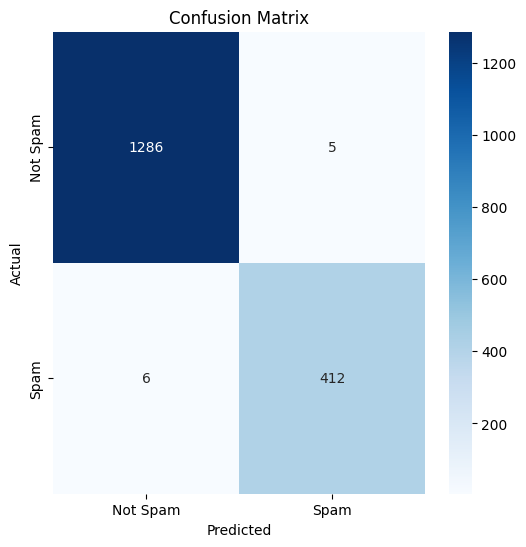

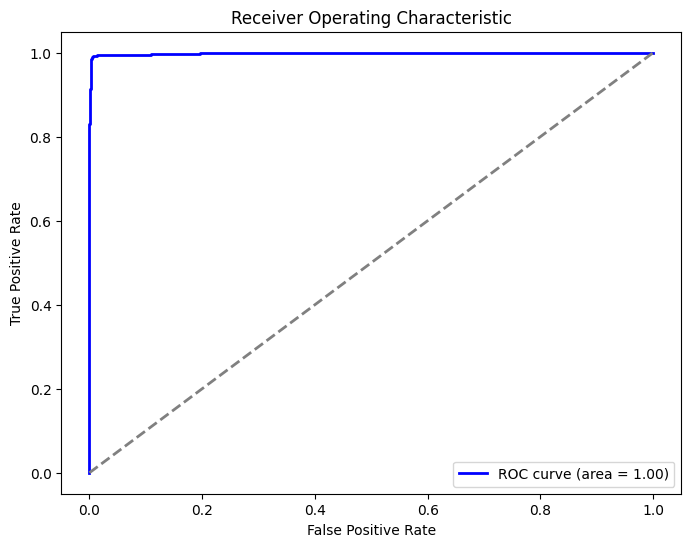

In [37]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# Printing the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
y_prob = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
import pickle

# Saving the model and vectorizer to .pkl files
with open('spam_svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

print("Model and vectorizer have been saved to .pkl files!")

Model and vectorizer have been saved to .pkl files!


# **Test the model by providing some input text or email content using the code snippet provided below.** 

In [45]:
# Loading the saved model and vectorizer
with open('model/spam_svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('model/tfidf_vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)


# Example: 
email_text = """ hurry you won lotery cupon pay 1000$ to claim your prize click here """
# Preprocess the email text
email_text = preprocess_text(email_text)
print(email_text)

# Transform the email text using the same vectorizer that was used during training
email_vectorized = loaded_vectorizer.transform([email_text]).toarray()

# Predict using the loaded model
prediction = loaded_model.predict(email_vectorized)

# Output the result
print(f'The email is: {"Spam" if prediction == 1 else "Not Spam"}')


hurry lotery cupon pay 1000 claim prize click
The email is: Spam
